# US Monthly CO2 Data

In [1]:
# imports
import pandas as pd
import numpy as np
import os

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('us_monthly_co2_data.csv')

In [3]:
df.head(28)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CKTCEUS,197301,109.552,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
1,CKTCEUS,197302,98.833,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
2,CKTCEUS,197303,98.483,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
3,CKTCEUS,197304,94.150,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
4,CKTCEUS,197305,95.424,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
5,CKTCEUS,197306,98.888,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
6,CKTCEUS,197307,104.371,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
7,CKTCEUS,197308,106.631,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
8,CKTCEUS,197309,99.436,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
9,CKTCEUS,197310,102.224,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide


In [4]:
df = df[df.YYYYMM.astype(str).str[-2:] != '13']

In [5]:
df = df.drop(['MSN', 'Column_Order', 'Description', 'Unit'], axis = 1)

In [6]:
df.rename(columns={'YYYYMM':'date', 'Value':'co2'}, inplace=True)

In [7]:
df.head(14)

,date,co2
0,197301,109.552
1,197302,98.833
2,197303,98.483
3,197304,94.150
4,197305,95.424
5,197306,98.888
6,197307,104.371
7,197308,106.631
8,197309,99.436
9,197310,102.224


In [8]:
df.tail()

,date,co2
8815,202102,415.513
8816,202103,398.802
8817,202104,366.332
8818,202105,376.347
8819,202106,403.179


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8148 entries, 0 to 8819
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8148 non-null   int64  
 1   co2     8148 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 191.0 KB


In [10]:
df.date = df.date.astype(str)

In [11]:
df.date = df.date.apply(lambda x: x[:4] + "-" + x[4:] + "-" + '01')

In [12]:
df.head(14)

,date,co2
0,1973-01-01,109.552
1,1973-02-01,98.833
2,1973-03-01,98.483
3,1973-04-01,94.150
4,1973-05-01,95.424
5,1973-06-01,98.888
6,1973-07-01,104.371
7,1973-08-01,106.631
8,1973-09-01,99.436
9,1973-10-01,102.224


In [13]:
df.date = pd.to_datetime(df.date, format = ('%Y-%m-%d'))


In [14]:
df.head()

,date,co2
0,1973-01-01,109.552
1,1973-02-01,98.833
2,1973-03-01,98.483
3,1973-04-01,94.150
4,1973-05-01,95.424


In [15]:
df.tail()

,date,co2
8815,2021-02-01,415.513
8816,2021-03-01,398.802
8817,2021-04-01,366.332
8818,2021-05-01,376.347
8819,2021-06-01,403.179


In [16]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

df.head()

,date,co2,year,month
0,1973-01-01,109.552,1973,1
1,1973-02-01,98.833,1973,2
2,1973-03-01,98.483,1973,3
3,1973-04-01,94.150,1973,4
4,1973-05-01,95.424,1973,5


In [17]:
df.tail()

,date,co2,year,month
8815,2021-02-01,415.513,2021,2
8816,2021-03-01,398.802,2021,3
8817,2021-04-01,366.332,2021,4
8818,2021-05-01,376.347,2021,5
8819,2021-06-01,403.179,2021,6


In [18]:
df.date

0      1973-01-01
1      1973-02-01
2      1973-03-01
3      1973-04-01
4      1973-05-01
          ...    
8815   2021-02-01
8816   2021-03-01
8817   2021-04-01
8818   2021-05-01
8819   2021-06-01
Name: date, Length: 8148, dtype: datetime64[ns]

In [19]:
df.isna().sum()

date     0
co2      0
year     0
month    0
dtype: int64

In [20]:
df = df.drop(['year', 'month'], axis = 1)

In [21]:
df.head()

,date,co2
0,1973-01-01,109.552
1,1973-02-01,98.833
2,1973-03-01,98.483
3,1973-04-01,94.150
4,1973-05-01,95.424


In [22]:
df = df.set_index('date')

In [23]:
# checking the size of the data using len() function
df_size = len(df)
df_size

8148

In [24]:
# looking a half of the data .5
len(df) * .5

4074.0

In [25]:
# compute num of rows that are 50% of total rows and assign to variable train_size
train_size = int(len(df) * .5)

# compute num of rows that are 30% of total rows and assign to variable validate_size
validate_size = int(len(df) * .3)

# make test_size the number of rows remaining (test_size = total # of rows - train_size - validate_size)
test_size = int(len(df) - train_size - validate_size)

# compute the row number at which the switch from validate to test happens. 
validate_end_index = train_size + validate_size

In [26]:
# split into train, validation, test
train = df[: train_size]
validate = df[train_size : validate_end_index]
test = df[validate_end_index : ]

In [27]:
# sum of train, validate and test = total number of rows? 
print(len(train) + len(validate) + len(test) == len(df))

True


In [28]:
# test the row starts
print(df.head(1) == train.head(1))

             co2
date            
1973-01-01  True


In [29]:
# test the split between validate and test
pd.concat([train.tail(1), validate.head(1)])
pd.concat([validate.tail(1), test.head(1)])

,co2
date,
1982-08-01,8.264
1982-09-01,5.836


In [30]:
# compare the last row of test to last row of df
pd.concat([test.tail(1), df.tail(1)])

,co2
date,
2021-06-01,403.179
2021-06-01,403.179


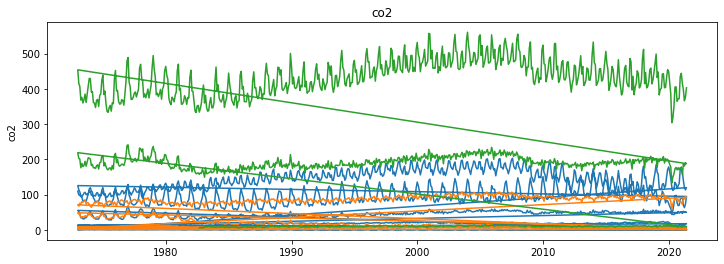

In [31]:
# plot the data points, color by train, validate, test
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [32]:
# define evaluation function to compute rmse

def evaluate(target_var):
    '''
    the evaluate function will take in the actual values in validate and the predicted values and compute the 
    mean squared error and then take the square root and round to zero decimals
    it will return the rmse 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [33]:
# plot and evaluate: plot
def plot_and_eval(target_var):
    '''
    a function to evaluate forecasts by computing the rmse and plot train and validate along with predictions
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    plt.legend()
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    
    plt.show()

In [34]:
# Create the empty dataframe with model_type, target_var, rmse
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

In [35]:
# check out the data frame
eval_df

,model_type,target_var,rmse


In [36]:
# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    '''
    this function is going to take in the mode_type as a string, the target variable as a string
    and rund the evaluate() function to compute the rmse,
    and append the dataframe a row with the model_type, target_var, and rmse.
    it will return the new dataframe
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [37]:
# last observed value
# make predictions
# taking the last observation
last_co2 = train['co2'][-1:][0]
last_co2

0.003

In [38]:
# make predictions
yhat_df = pd.DataFrame({'co2': [last_co2]}, 
                       index = validate.index)

yhat_df.head(2)

,co2
date,
1973-01-01,0.003
1973-02-01,0.003


co2 -- RMSE: 44


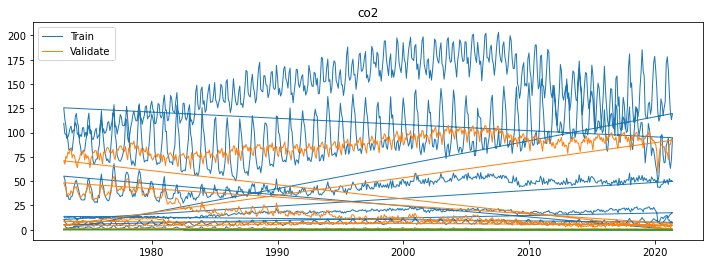

In [39]:
for col in train.columns:
    plot_and_eval(col)

In [41]:
df.tail()

,co2
date,
2021-02-01,415.513
2021-03-01,398.802
2021-04-01,366.332
2021-05-01,376.347
2021-06-01,403.179


In [42]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)

In [43]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,co2,44.0


In [44]:
# Simple Average
# make predictions
avg_co2 = round(train['co2'].mean(), 2)

def make_predictions():
    yhat_df = pd.DataFrame({'co2': [avg_co2]}, 
                       index = validate.index)
    return yhat_df

yhat_df = make_predictions()

In [45]:
yhat_df.head() # check_yo_head

,co2
date,
1973-01-01,44.48
1973-02-01,44.48
1973-03-01,44.48
1973-04-01,44.48
1973-05-01,44.48


co2 -- RMSE: 39


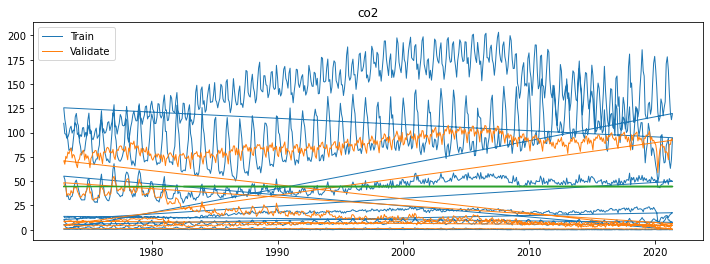

In [46]:
# plotting actual vs. predicted values
for col in train.columns:
    plot_and_eval(col)

In [47]:
# evaluate using MSE and RMSE, and add evaluation metrics to eval_df
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                             target_var = col)

In [48]:
# evaluation metrics on eval_df
eval_df

,model_type,target_var,rmse
0,last_observed_value,co2,44.0
1,simple_average,co2,39.0


In [49]:
# compute a 30 day rolling average,
# use the most recent/last 30 day period value to predict forward.
period = 30

avg_co2 = round(train['co2'].rolling(period).mean().iloc[-1], 2)

yhat_df = make_predictions()
yhat_df.head(3)

,co2
date,
1973-01-01,0.09
1973-02-01,0.09
1973-03-01,0.09


co2 -- RMSE: 44


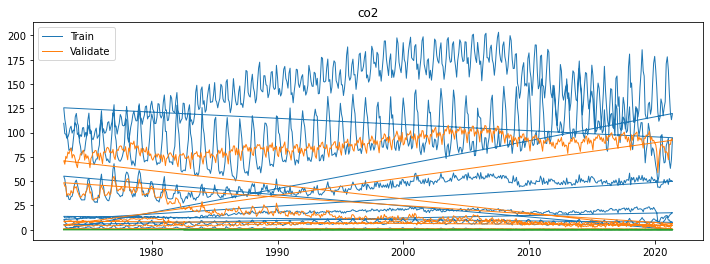

In [50]:
# plotting actual vs. predicted values
for col in train.columns:
    plot_and_eval(col)

In [51]:
# evaluate using MSE and RMSE, and add evaluation metrics to eval_df
for col in train.columns:
    eval_df = append_eval_df(model_type='30d moving average', 
                             target_var = col)

In [52]:
# evaluation metrics on eval_df
eval_df

,model_type,target_var,rmse
0,last_observed_value,co2,44.0
1,simple_average,co2,39.0
2,30d moving average,co2,44.0


In [53]:
# Let's try out several other values for periods

periods = [1, 60, 90, 120, 150]

for p in periods:
    avg_co2 = round(train['co2'].rolling(p).mean().iloc[-1], 2)
    yhat_df = make_predictions()
    model_type = str(p) + 'd moving average'
    eval_df = append_eval_df(model_type = model_type,
                             target_var = 'co2'
                            )

In [54]:
# evaluation metrics on eval_df
eval_df

,model_type,target_var,rmse
0,last_observed_value,co2,44.0
1,simple_average,co2,39.0
2,30d moving average,co2,44.0
3,1d moving average,co2,44.0
4,60d moving average,co2,44.0
5,90d moving average,co2,44.0
6,120d moving average,co2,44.0
7,150d moving average,co2,44.0


In [55]:
# Which is best so far?
min_rmse_amount = eval_df.groupby('target_var')['rmse'].min()[0]
min_rmse_amount

39.0

In [56]:
# evaluation metrics on eval_df
eval_df[((eval_df.rmse == min_rmse_amount)
        )]

,model_type,target_var,rmse
1,simple_average,co2,39.0


In [57]:
# setting up for plots
plt.rc('figure', figsize=(12, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

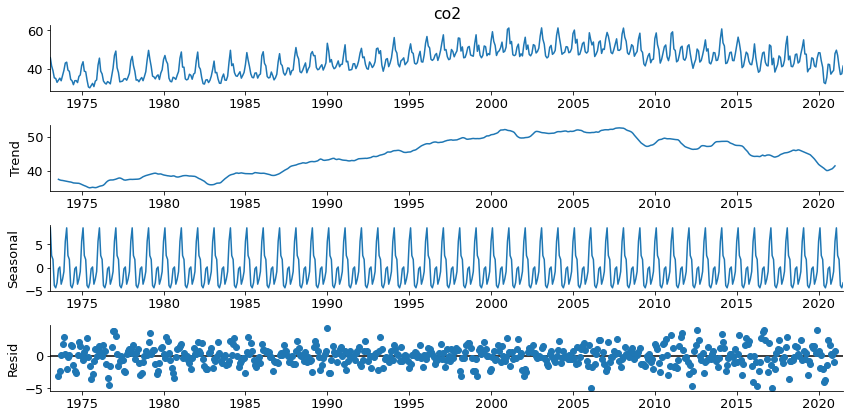

In [59]:
# Holt's Linear Trend
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train['co2'].resample('M').mean()).plot()
plt.show()

In [60]:
for col in train.columns:
    model = Holt(train[col], exponential = False)
    model = model.fit(smoothing_level = .1, 
                      smoothing_slope = .1, 
                      optimized = False)
    yhat_items = model.predict(start = validate.index[0], 
                               end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

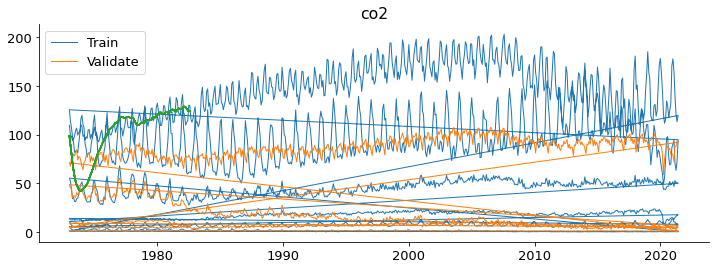

In [61]:
for col in train.columns:
    plot_and_eval(target_var = col)

In [62]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'Holts', 
                             target_var = col)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [63]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,co2,44.0
1,simple_average,co2,39.0
2,30d moving average,co2,44.0
3,1d moving average,co2,44.0
4,60d moving average,co2,44.0
5,90d moving average,co2,44.0
6,120d moving average,co2,44.0
7,150d moving average,co2,44.0


In [67]:
df.head()

,co2
date,
1973-01-01,109.552
1973-02-01,98.833
1973-03-01,98.483
1973-04-01,94.150
1973-05-01,95.424


In [68]:
# Predict Based on Previous Cycle

# re-split the data
train = df.date[:'2018']
validate = df.date[('2019')]
test = df.date[('2020')]

AttributeError: 'DataFrame' object has no attribute 'date'